# <font color='blue'>Project 2: Build a Traffic Sign Recognition Classifier</font>
<div class= "alert alert-block alert-info"> *Use deep learning to classify different traffic signs. *</div>

## Project Content

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab   as pl
import cv2
import random
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten

import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

In [2]:
training_file   = 'train.p'
validation_file = 'valid.p'
testing_file    = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

---

## Step 1: Dataset Summary & Exploration

> The pickled data is a dictionary with 4 key/value pairs:

> - `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
> - `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
> - `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
> - `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set

In [3]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test , y_test  = test['features'] , test['labels']
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

# Number of training, validation and testing examples
n_train, n_validation, n_test = len(X_train), len(X_valid), len(X_test)

# Shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Image Shape: (32, 32, 3)
Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### An exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s).

In [4]:
### Data exploration visualization code goes here.
# Visualizations will be shown in the notebook.
%matplotlib inline

labels_list = pd.read_csv('signnames.csv')
labels_name = labels_list['SignName'].tolist()
labels_list

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [5]:
# rename column to ClasId, and enforce a single dtype of labels pickedl data
dataset_labels        = pd.DataFrame(y_train, columns= ['ClassId'], dtype=np.int64) 
# merge dataset with csv list
merged_dataset_labels = dataset_labels.merge(labels_list, how='inner', on='ClassId')
# calculate the data summary
data_summary          = merged_dataset_labels.groupby(['SignName']).count()
# count of each sign
data_summary.rename(columns={'ClassId': 'Count of each sign'}, inplace=True)
#data_summary
data_summary

,Count of each sign
SignName,
Ahead only,1080
Beware of ice/snow,390
Bicycles crossing,240
Bumpy road,330
Children crossing,480
Dangerous curve to the left,180
Dangerous curve to the right,300
Double curve,270
End of all speed and passing limits,210


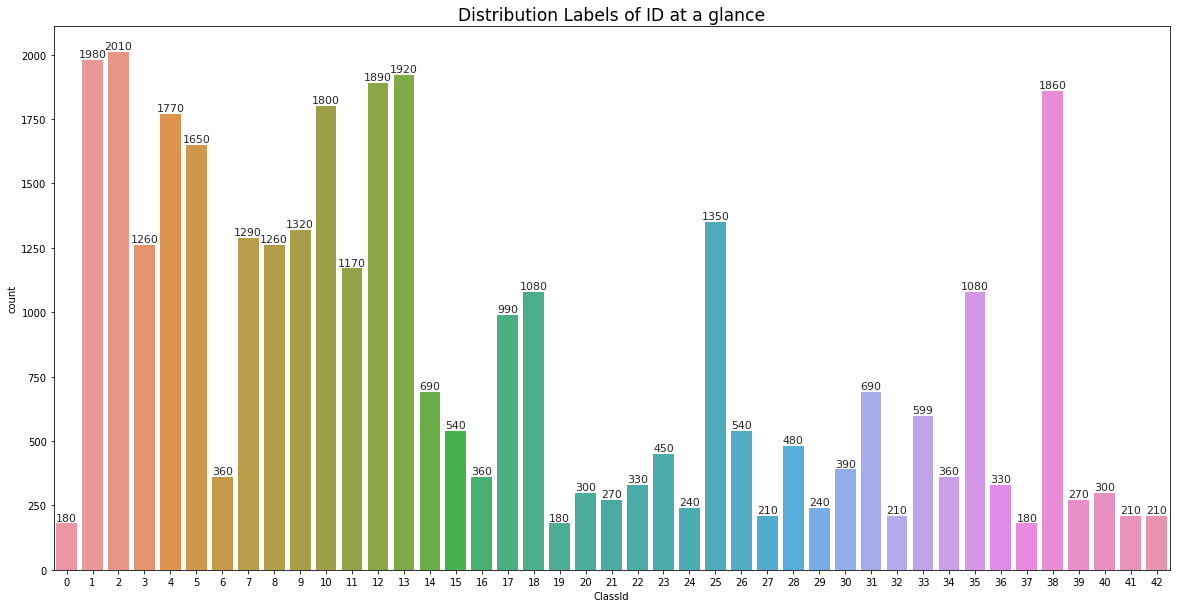

In [6]:
# distribution of data summary

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set('talk', 'whitegrid', 'dark', font_scale=1.1,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
#sns.countplot(x = 'ClassId', data= dataset_labels)
sns.countplot(x = 'ClassId', data= merged_dataset_labels)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0f}'.format(height), ha="center", va='bottom',size=11)
pl.title('Distribution Labels of ID at a glance')

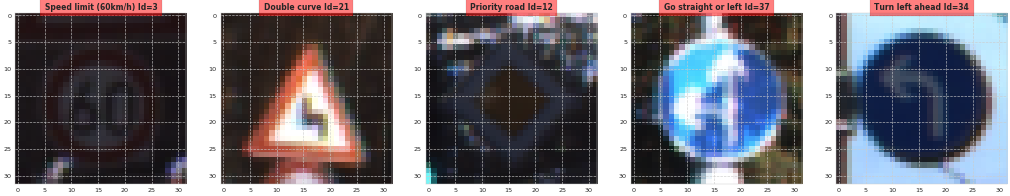

In [7]:
# plotting random traffic sign images

plt.figure(figsize=(40,40), dpi=32)
for i in range(1,6):
    plt.subplot(1,5, i)
    index    = np.random.randint(0, len(X_train))
    image    = X_train[index].squeeze()
    plt.title(labels_list.loc[y_train[index],"SignName"]+" Id="\
              + str(labels_list.loc[y_train[index],"ClassId"]),\
              fontweight='bold',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    plt.imshow(image)
plt.show()

----

## Step 2: Design and Test a Model Architecture

>  Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

>  The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

>  With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

>  There are various aspects to consider when thinking about this problem:

>  - <i>Neural network architecture (is the network over or underfitting?)</i>
>  - <i>Play around preprocessing techniques (normalization, rgb to grayscale, etc)</i>
>  - <i>Number of examples per label (some have more than others).</i>
>  - <i>Generate fake data.</i>

>  Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

---
### Number of examples per label.

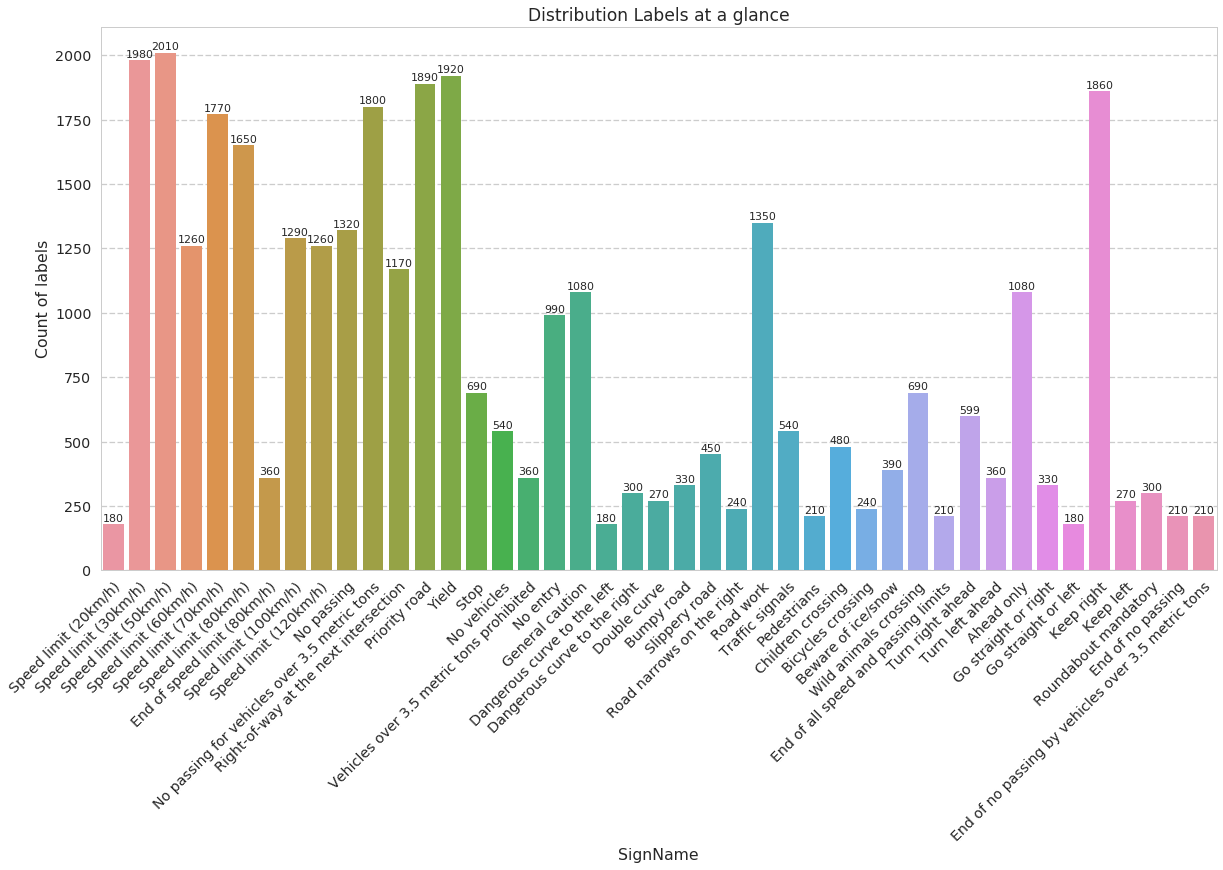

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

sns.set('talk', 'whitegrid', 'dark', font_scale=1.1,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
ax = sns.countplot(x = 'SignName',\
                   data  = merged_dataset_labels,\
                   order = labels_name)

ax.set_ylabel('Count of labels')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:.0f}'.format(height), ha="center", va='bottom',size=11) 

pl.title('Distribution Labels at a glance')

---
### Generate fake data.

Some classes have less than 300 images as above, which may cause poor classification than other images. So image augmentation is the way to go to makes those classes have larger numbers of images. The original dataset would be made by adding its transformed versions. These versions are randomly perturbed in `transform`: 
- position  ([-2,2] pixels), AND
- scale  ([.9,1.1] ratio), AND
- rotation([-15,+15]  degrees)

More  diverse training set deformations were also investigated in such as brightness, contrast, shear and blur perturbations to addresst he numerous real-world deformations.

In [9]:
def transform(image):
    """
    use OpenCv to change brightness, contrast and blur the image
    use OpenCV's transformation functions `cv2.warpAffine` to randomly generate datas
    1. position ([-2,2] pixels), AND
    2. scale ([.9,1.1] ratio), AND
    3. rotation([-15,+15] degrees)
    """
    # http://cartucho.github.io/tutorial_basic_linear_transform.html
    # Changing brightness and contrast of image
    image = cv2.add(cv2.multiply(image, np.array([random.uniform(1.0, 3.0)])),\
                    random.uniform(0, 100))
    
    # bluring the image
    kernel = random.randrange(1,9,2) # random odd number from 1 to 9
    image = cv2.blur(image,(kernel,kernel))
    
    # grap the dimension of image and calculate random transform
    (h, w) = image.shape[:2]
    center = (w / 2 + random.uniform(-2, 2), h / 2 + random.uniform(-2, 2))
    angle  = random.uniform(-15, 15)
    scale  = random.uniform(.9, 1.1)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    
    return cv2.warpAffine(image, M, (w, h))


def jittere_Dataset(X, y, number):
    """
    Generate data at each class if it has less than :
    1. Input : X(features), y_train(labels) , number(number of fake images to add)
    2. Output: X(features + added features ), y_train(labels + added labels)
    """
    X_new = X
    y_new = y
    
    n_classes = len(np.unique(y)) # number of classes: 43
    for i in range(n_classes):
        n_examples = len(np.where(y_train == i)[0]) # calculate number of examples at each class
        if n_examples < number:
            # add to reach the desired number examples at each class.
            for j in range(number - n_examples):
                #choose random one image to transfom
                img       = X[np.where(y_train == i)[0][np.random.randint(0, n_examples)]]
                trans_img = transform(img)
                
                # add transformed image and its id to X,y
                X_new = np.concatenate((X_new,[trans_img]), axis = 0)
                y_new = np.concatenate((y_new,[i]), axis = 0)
        print ("Done", i)
                
    return X_new,y_new

In [10]:
X_train_ji, y_train_ji = jittere_Dataset(X_train, y_train, 1000)
print("Training Set:   {} samples".format(len(X_train_ji)))
print("Number of classes =", len(np.unique(y_train_ji)))
print("Number of classes =", len(y_train_ji))

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19
Done 20
Done 21
Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29
Done 30
Done 31
Done 32
Done 33
Done 34
Done 35
Done 36
Done 37
Done 38
Done 39
Done 40
Done 41
Done 42
Training Set:   51690 samples
Number of classes = 43
Number of classes = 51690


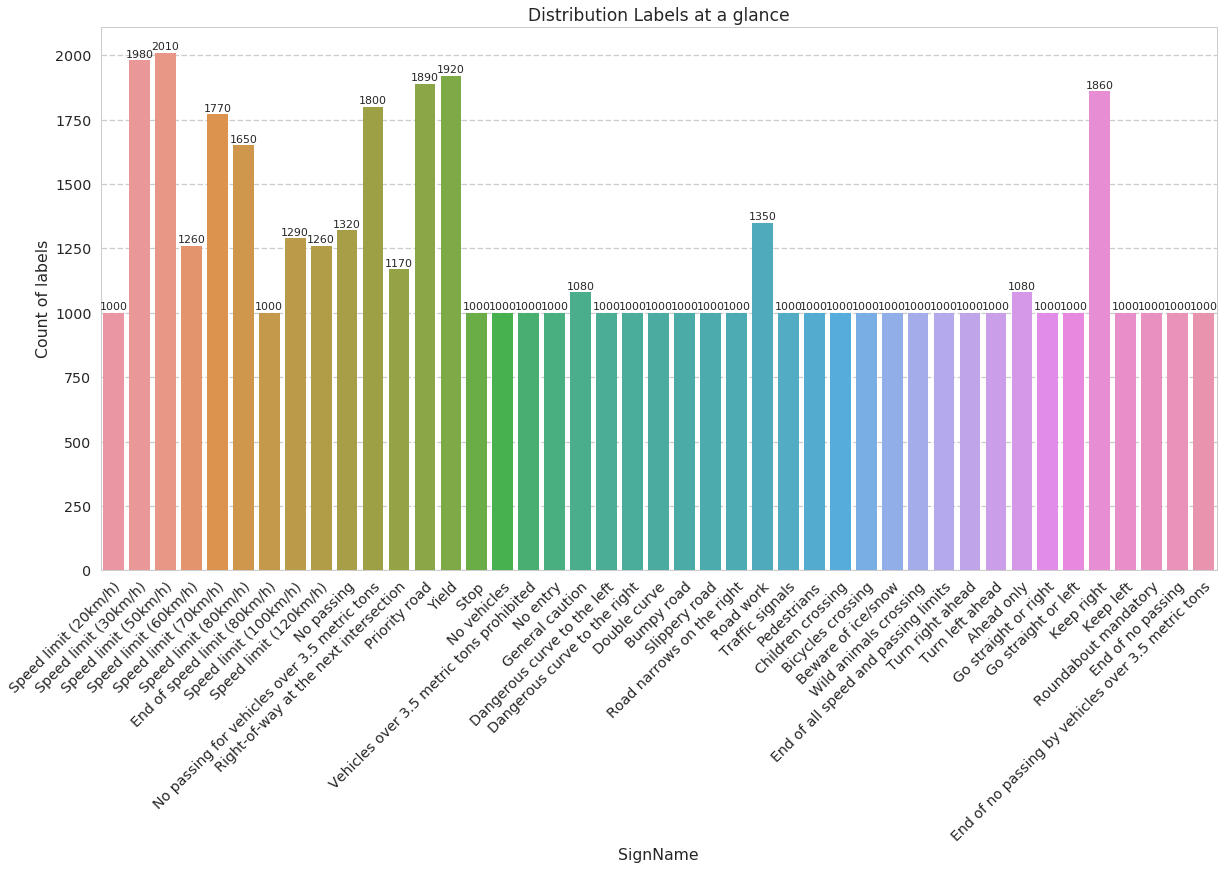

In [11]:
# rename column to ClasId, and enforce a single dtype of labels pickedl data
dataset_labels_new        = pd.DataFrame(y_train_ji, columns= ['ClassId'], dtype=np.int64) 
# merge dataset with csv list
merged_dataset_labels_new = dataset_labels_new.merge(labels_list, how='inner', on='ClassId')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

sns.set('talk', 'whitegrid', 'dark', font_scale=1.1,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
ax = sns.countplot(x = 'SignName',\
                   data  = merged_dataset_labels_new,\
                   order = labels_name)

ax.set_ylabel('Count of labels')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,'{:.0f}'.format(height), ha="center", va='bottom',size=11) 

pl.title('Distribution Labels at a glance')

---
### Pre-process the Data Set

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
# 1. convert image to grayscale, denoise and contrast enhancing
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    if conv == 'RGB2Lab':
        return cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    if conv == 'RGB2GRAY':
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def globalcontrast_enhancing(img):
    return cv2.equalizeHist(img)

def localcontrast_enhancing(img):
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    result = clahe.apply(img)
    return result

### Preprocess the data here.
def preprocess(data):
    imgs = np.ndarray(shape=(data.shape[0],data.shape[1],data.shape[2],1), dtype=np.uint8)
    for i, img in enumerate(data):
        gray_img     = convert_color(img, conv='RGB2YUV')[:,:,0]
        contrast_img = globalcontrast_enhancing(gray_img)
        contrast_img = localcontrast_enhancing(contrast_img)
        img          = np.expand_dims(contrast_img, axis=2)
        imgs[i]      = img
    return imgs

X_train_pp = preprocess(X_train_ji)
X_valid_pp = preprocess(X_valid)
X_test_pp  = preprocess(X_test)

def normaize(data):
    data  = data.astype('float32')
    data -= np.mean(data)
    data /= np.std(data)
    return data

X_train_pp = normaize(X_train_pp)
X_valid_pp = normaize(X_valid_pp)
X_test_pp  = normaize(X_test_pp)
print("Image Shape: {}".format(X_train_pp[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train_pp)))
print("Validation Set: {} samples".format(len(X_valid_pp)))
print("Test Set:       {} samples".format(len(X_test_pp)))

Image Shape: (32, 32, 1)

Training Set:   51690 samples
Validation Set: 4410 samples
Test Set:       12630 samples


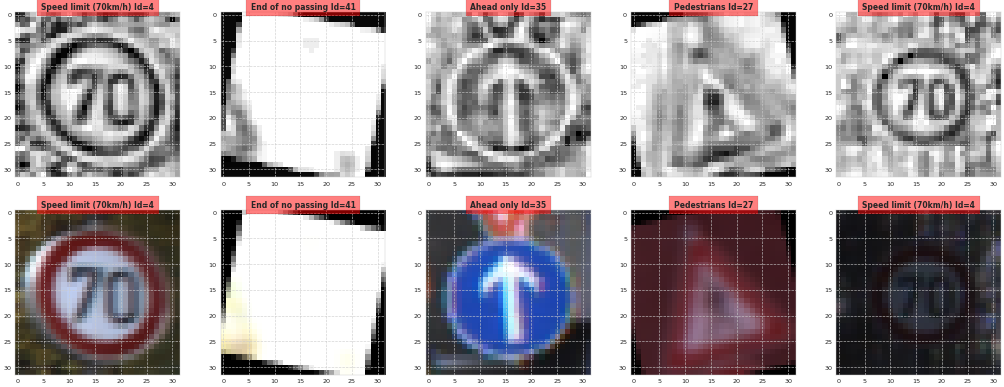

In [18]:
# plotting random traffic sign images and their preprocessed images
plt.figure(figsize=(40,15), dpi=32)
pos = 1
for i in range(1,6): 
    index = np.random.randint(0, len(X_train_pp))
    # show image after preprocess
    plt.subplot(2,5, i)
    image = X_train_pp[index].squeeze()
    plt.title(labels_list.loc[y_train_ji[index],"SignName"]+" Id="\
              + str(labels_list.loc[y_train_ji[index],"ClassId"]),\
              fontweight='bold',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    plt.imshow(image, cmap="gray")
    
    # show image before preprocess 
    plt.subplot(2,5, i+5)
    image = X_train_ji[index].squeeze()
    plt.title(labels_list.loc[y_train_ji[index],"SignName"]+" Id="\
              + str(labels_list.loc[y_train_ji[index],"ClassId"]),\
              fontweight='bold',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    plt.imshow(image, cmap="gray")
    
plt.show()

---
### Model Architecture

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
EPOCHS = 40
BATCH_SIZE = 128#256

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    """LAYER 1"""
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    """LAYER 2"""
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    """LAYER 3"""
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Add Dropbout
    # Activation.
    fc1    = tf.nn.relu(fc1)
     # Dropout
    fc1    = tf.nn.dropout(fc1, keep_prob)
    
    """LAYER 4"""
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Add Dropbout 
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Dropout
    fc2    = tf.nn.dropout(fc2, keep_prob)
    
    """LAYER 5"""
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    

### Training Pipline

Create a training pipline that uses the model to classify

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43) #10
keep_prob = tf.placeholder(tf.float32) # Use dropbout

rate = 0.0009#0.0001#0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # Use Dropout instead of Max-pool
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. 
-  A low accuracy on the training and validation sets imply underfitting. 
-  A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
from tensorflow.python.client import device_lib

def get_available_devices():  
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices()) 

['/cpu:0']


In [23]:
### Train your model here.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train_pp)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_pp, y_train_ji = shuffle(X_train_pp, y_train_ji)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pp[offset:end], y_train_ji[offset:end]
            #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        validation_accuracy = evaluate(X_valid_pp, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.821

EPOCH 2 ...
Validation Accuracy = 0.881

EPOCH 3 ...
Validation Accuracy = 0.902

EPOCH 4 ...
Validation Accuracy = 0.914

EPOCH 5 ...
Validation Accuracy = 0.920

EPOCH 6 ...
Validation Accuracy = 0.929

EPOCH 7 ...
Validation Accuracy = 0.946

EPOCH 8 ...
Validation Accuracy = 0.944

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.949

EPOCH 11 ...
Validation Accuracy = 0.952

EPOCH 12 ...
Validation Accuracy = 0.954

EPOCH 13 ...
Validation Accuracy = 0.956

EPOCH 14 ...
Validation Accuracy = 0.956

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.956

EPOCH 17 ...
Validation Accuracy = 0.960

EPOCH 18 ...
Validation Accuracy = 0.959

EPOCH 19 ...
Validation Accuracy = 0.960

EPOCH 20 ...
Validation Accuracy = 0.960

EPOCH 21 ...
Validation Accuracy = 0.958

EPOCH 22 ...
Validation Accuracy = 0.962

EPOCH 23 ...
Validation Accuracy = 0.963

EPOCH 24 ...
Validation Accura

**Try**:
1. Preprocess in step 2, `Validation Accuracy` can reach at 0.93.
2. Data augmentation was implemented to reduce overfitting on models. `Validation Accuracy` can reach at 0.94
3. `BATCH_SIZE`'s increment from 128 to 256, 512 results in  reduction of `Validation Accuracy`. Keep `BATCH_SIZE`= 128 as default.
4. Reduce learning rate, for example from 0.001 to 0.0001 makes `Validation Accuracy` worse, while trying to run more `EPOCH` is not going to help. Feels like 20 `EPOCH` is good enough.
 1. `rate` = 0.0009, and `EPOCH` = 30, `Validation Accuracy` = 0.946.
4. Try different regulation as `dropout`. Apply `dropout` at fully connected layer can help improve the accuracy of neural network.`Validation Accuracy` could reach up to 0.971 at . <i>Note</i>: Add  `dropout` after  `max_pool` decrease `Validation Accuracy`.

In [24]:
### Test your model here.

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver_test = tf.train.import_meta_graph('./lenet.meta')
    saver_test.restore(sess, "./lenet")
    
    test_accuracy = evaluate(X_test_pp, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.939


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

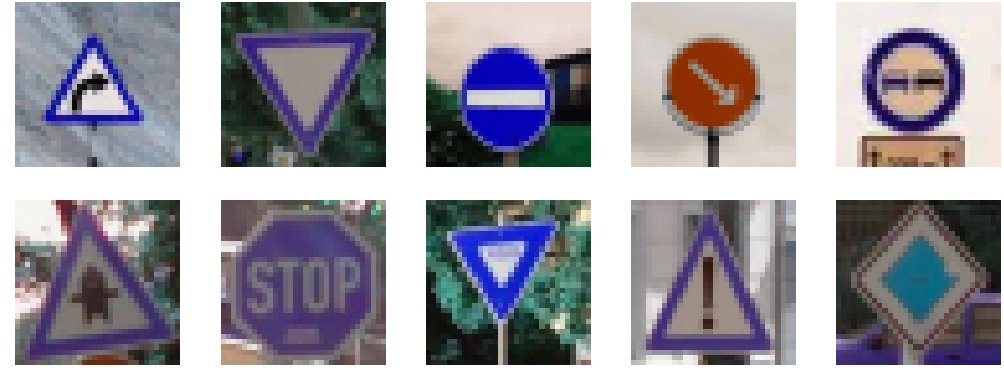

In [25]:
### Load the images and plot them here.
import glob

# get images downloaded from internet
test_images = glob.glob('./Test_images/*.jpg')
# create empty 4D array to store those raw pixel data of the traffic sign images above
X_newimages = np.empty((len(test_images), 32, 32, 3), dtype=np.uint8)

fig, axs = plt.subplots(figsize=(40,15), dpi=32)
# add new images to X_newimages and all images
for i, img in enumerate(test_images):
    image = cv2.imread(img) # read image
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA) # change size
    image = np.array(image) # convert to array
    X_newimages[i] = image
    # show image
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(image)

plt.show()

In [26]:
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
X_newimages = preprocess(X_newimages)
X_newimages = normaize(X_newimages)
print(X_newimages.shape)

(10, 32, 32, 1)


### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
newimages_labels = [ 20, 13, 17, 38, 9, 11, 14, 13, 18, 12]
            
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver_testnew = tf.train.import_meta_graph('./lenet.meta')
    saver_testnew.restore(sess, "./lenet")
    newimage_accuracy = evaluate(X_newimages, newimages_labels)
    
    print("New Image Test Accuracy = {:.3f}".format(newimage_accuracy))

New Image Test Accuracy = 0.800


### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

softmax_logits = tf.nn.softmax(logits)
top_5          = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    
    softmax_logits_n = sess.run(softmax_logits, feed_dict={x: X_newimages, keep_prob: 1.0})
    top_5_n          = sess.run(top_5, feed_dict={x: X_newimages, keep_prob: 1.0})

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

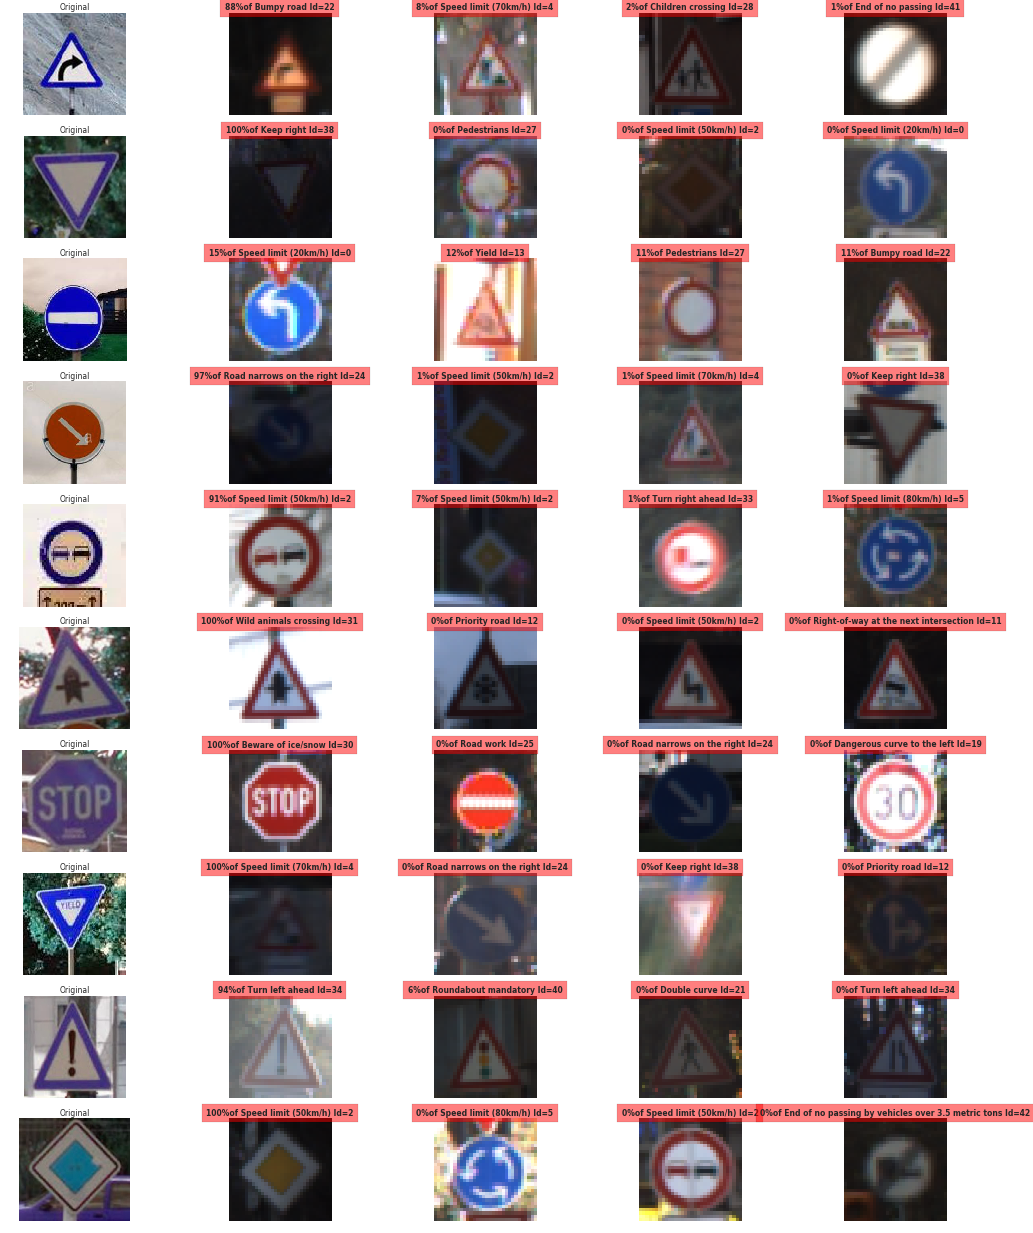

In [29]:
fig, axs = plt.subplots(figsize=(40,50), dpi=32)
for i, img in enumerate(test_images):
    image = cv2.imread(img) # read image
    # show image
    plt.subplot(len(test_images),5, 5*i+1) 
    plt.axis('off')
    plt.title('Original')
    plt.imshow(image)
    
    for j in range(0, 4):
        index = top_5_n[1][i][j]
        perce = top_5_n[0][i][j]*100
        n_examples = len(np.where(y_train == index)[0])
        image = X_train[np.where(y_train == index)[0][np.random.randint(0, n_examples)]].squeeze()

        plt.subplot(len(test_images),5, 5*i+1 +j+1)
        plt.axis('off')
        plt.title(str("{0:.0f}%".format(perce))+"of "+labels_list.loc[y_train_ji[index],"SignName"]+" Id="\
              + str(labels_list.loc[y_train_ji[index],"ClassId"]),\
              fontweight='bold',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
        plt.imshow(image, cmap='gray')

plt.show()

In [30]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    saver_train = tf.train.import_meta_graph('./lenet.meta')
    saver_train.restore(sess, "./lenet")
    
    train_accuracy = evaluate(X_train_pp, y_train_ji)
    
    print("Train Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.939


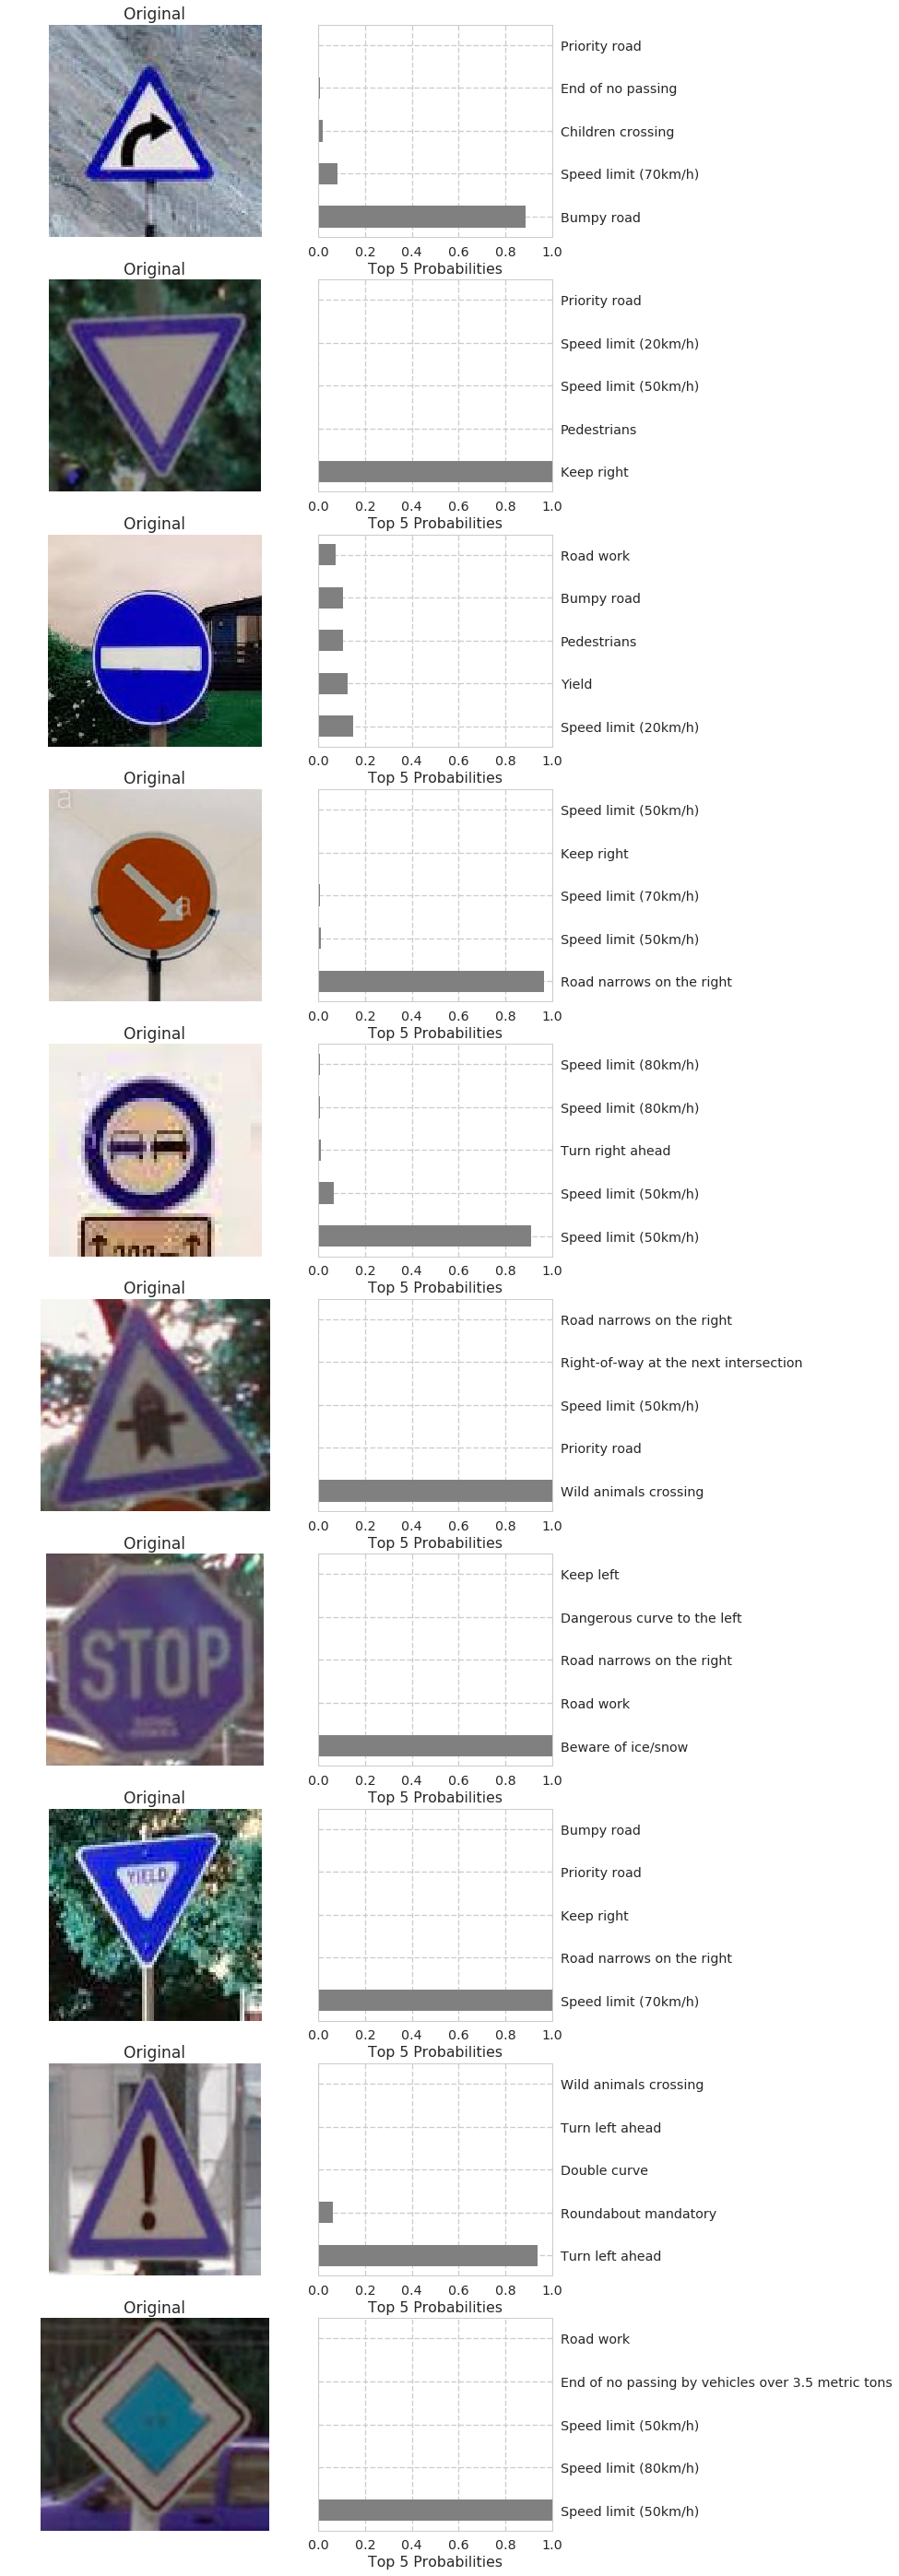

In [56]:
implot = plt.figure(figsize=(10,50))
for i, img in enumerate(test_images):
    

    ax_image = implot.add_subplot(len(test_images),2,2*i+1)
    ax_image.grid(False)
    ax_image.axis('off')
    image = cv2.imread(img)
    ax_image.set_title('Original')
    ax_image.imshow(image)


    index = top_5_n[1][i]
    percen= top_5_n[0][i]
    labels= [labels_list.loc[y_train_ji[index[j]],"SignName"] for j in range(0,5)]

    graph = implot.add_subplot(len(test_images),2,2*i+2)
    graph.barh(np.arange(len(index)), percen, align='center',height=0.5, color='gray')
    graph.set_yticks(np.arange(len(index)))
    graph.set_yticklabels(labels)
    graph.yaxis.set_ticks_position('right')
    graph.set_xlabel('Top 5 Probabilities')
    graph.set_xlim([0, 1])

    #plt.tight_layout()
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")